In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

salaries=pd.read_csv("ds_salaries_clean.csv")
salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


In [ ]:
salaries.select_dtypes("object").head()
# df.select_dtypes("object") method will
# remove all numerical values and only show text values.

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [ ]:
print(salaries["Designation"].nunique())

50


Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: Designation, dtype: int64


Text(0.5, 1.0, 'Tope 5 most common data professional job titles ')

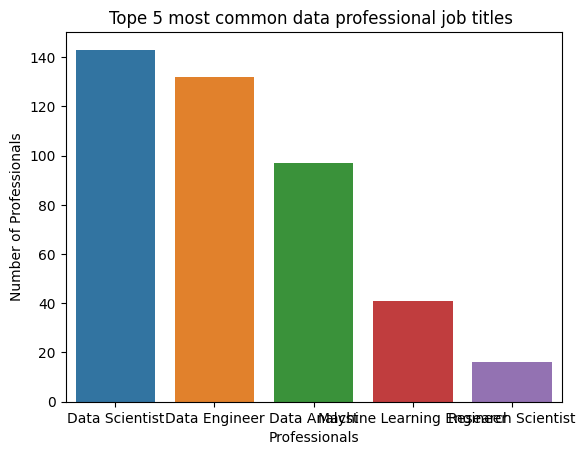

In [17]:
salaries_count=salaries["Designation"].value_counts().iloc[0:5]
print(salaries_count)
# sns.barplot(salaries_count) #error
sns.barplot(x=salaries_count.index,y=salaries_count.values)

plt.xlabel("Professionals")
plt.ylabel("Number of Professionals")
plt.title("Tope 5 most common data professional job titles ")

                    Designation      Job_Category
0                Data Scientist      Data Science
1    Machine Learning Scientist      Data Science
2             Big Data Engineer  Data Engineering
3          Product Data Analyst    Data Analytics
4     Machine Learning Engineer  Machine Learning
..                          ...               ...
602               Data Engineer  Data Engineering
603               Data Engineer  Data Engineering
604                Data Analyst    Data Analytics
605                Data Analyst    Data Analytics
606                AI Scientist      Data Science

[607 rows x 2 columns]


<Axes: xlabel='Job_Category', ylabel='count'>

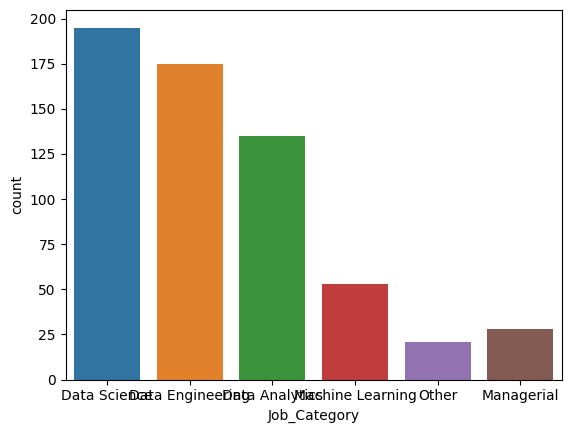

In [23]:
job_category=["Data Science","Data Analytics","Data Engineering","Machine Learning","Managerial","Cosultant"]

################################################################################
data_science="Scientist|NLP"###changed it from "Data Scientist" to "Scientist"#
data_analyst="Analyst|Analytics"                                               #
data_engineer="Data Engineer|ETL|Architect|Infrastructure"                     #
ml_engineer="Machine Learning|ML|Big Data|AI"                                  #
manager="Manager|Head|Director|Lead|Principal|Staff"                           #
consultant="COnsultant|Freelance"                                              #
################################################################################




conditions=[
    (salaries["Designation"].str.contains(data_science)),
    (salaries["Designation"].str.contains(data_analyst)),
    (salaries["Designation"].str.contains(data_engineer)),
    (salaries["Designation"].str.contains(ml_engineer)),
    (salaries["Designation"].str.contains(manager)),
    (salaries["Designation"].str.contains(consultant))
]



salaries["Job_Category"]=np.select(conditions,job_category,default="Other")
print(salaries[["Designation","Job_Category"]])


sns.countplot(data=salaries,x="Job_Category")

In [55]:
print(planes["Duration"].describe())

count       7848
unique       360
top       2h 50m
freq         391
Name: Duration, dtype: object


# Practice

In [26]:
planes=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Second year first sem/DATA SCIENCE/W4/W4 - Data Sets & Solutions/Airlines_unclean.csv")

In [29]:
non_numeric=planes.select_dtypes("object")
for col in non_numeric.columns:
  print(f"Number of Unique Values in {col} column : ",non_numeric[col].nunique())

Number of Unique Values in Airline column :  8
Number of Unique Values in Date_of_Journey column :  40
Number of Unique Values in Source column :  5
Number of Unique Values in Destination column :  6
Number of Unique Values in Route column :  126
Number of Unique Values in Dep_Time column :  221
Number of Unique Values in Arrival_Time column :  1334
Number of Unique Values in Duration column :  367
Number of Unique Values in Total_Stops column :  5
Number of Unique Values in Additional_Info column :  10


In [30]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [49]:
#### data cleaning ###

threshold=len(planes)*0.05
cols_to_drop=planes.columns[planes.isna().sum() <threshold]
planes.dropna(subset=cols_to_drop,inplace=True)
planes=planes.drop(columns=['Additional_Info'])
prices_d=planes.groupby("Airline")["Price"].median().to_dict()
planes["Price"]=planes["Price"].fillna(planes["Airline"].map(prices_d))


      Duration Duration_Category
0          19h    medium_flights
1       5h 25m    medium_flights
2       4h 45m     short_flights
3       2h 25m     short_flights
4      15h 30m    medium_flights
...        ...               ...
10654   2h 40m     short_flights
10655   2h 30m     short_flights
10656   2h 35m     short_flights
10658   2h 40m     short_flights
10659   8h 20m    medium_flights

[7848 rows x 2 columns]


<Axes: xlabel='Duration_Category', ylabel='count'>

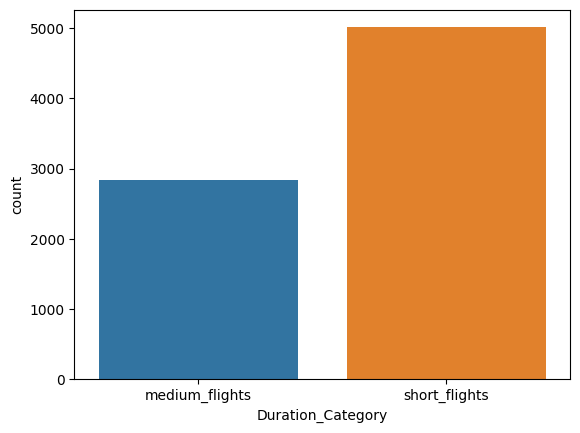

In [50]:

short_flights="0h|1h|2h|3h|4h"
medium_flights="5h|6h|7h|8h|9h"
long_flights="10h|11h|12h|13h|14h|15h|16h"

duration_categories=["short_flights","medium_flights","long_flights"]

conditions=[
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))]



planes["Duration_Category"] = np.select(conditions, duration_categories, default="Extreme duration")

print(planes[["Duration","Duration_Category"]])


sns.countplot(data=planes,x="Duration_Category")